In [1]:
from fact.io import read_h5py, to_h5py
import pandas as pd
import numpy as np

In [2]:
crab_events = read_h5py('/home/nbreer/Downloads/data/open_crab_sample_dl3.hdf5', key='events')
crab_runs = read_h5py('/home/nbreer/Downloads/data/open_crab_sample_dl3.hdf5', key='runs')
gamma_events = read_h5py('/home/nbreer/Downloads/data/gamma_test_dl3.hdf5', key='events')
corsika_events = read_h5py('/home/nbreer/Downloads/data/gamma_corsika_headers.hdf5', key='corsika_events')
corsika_runs = read_h5py('/home/nbreer/Downloads/data/gamma_corsika_headers.hdf5', key='corsika_runs')

In [3]:
lim_theta = np.sqrt(0.025)
crab_events_pred = crab_events[crab_events['gamma_prediction'] > 0.8]
crab_events_sel = crab_events_pred[crab_events_pred['theta_deg'] < lim_theta]

Detektor-Signifikanz für den Krebsnebel

In [32]:
import matplotlib.pyplot as plt
lim_theta_plot = np.sqrt(0.3)

crab_events_pred_1 = crab_events_pred[crab_events_pred['theta_deg_off_1'] < lim_theta_plot]
crab_events_pred_2 = crab_events_pred[crab_events_pred['theta_deg_off_2'] < lim_theta_plot]
crab_events_pred_3 = crab_events_pred[crab_events_pred['theta_deg_off_3'] < lim_theta_plot]
crab_events_pred_4 = crab_events_pred[crab_events_pred['theta_deg_off_4'] < lim_theta_plot]
crab_events_pred_5 = crab_events_pred[crab_events_pred['theta_deg_off_5'] < lim_theta_plot]

crab_events_sel = crab_events_pred[crab_events_pred['theta_deg'] < lim_theta_plot]

In [33]:
crab_events_sel_1 = crab_events_pred[crab_events_pred['theta_deg_off_1'] < lim_theta]
crab_events_sel_2 = crab_events_pred[crab_events_pred['theta_deg_off_2'] < lim_theta]
crab_events_sel_3 = crab_events_pred[crab_events_pred['theta_deg_off_3'] < lim_theta]
crab_events_sel_4 = crab_events_pred[crab_events_pred['theta_deg_off_4'] < lim_theta]
crab_events_sel_5 = crab_events_pred[crab_events_pred['theta_deg_off_5'] < lim_theta]
bkg = pd.concat([crab_events_sel_1, crab_events_sel_2, crab_events_sel_3, crab_events_sel_4, crab_events_sel_5])

In [34]:
theta_deg_off = []
for i in [1, 2, 3, 4, 5]:
    exec('x = crab_events_pred_{}.theta_deg_off_{}.values'.format(i, i))
    for el in x:
        theta_deg_off.append(el)

250


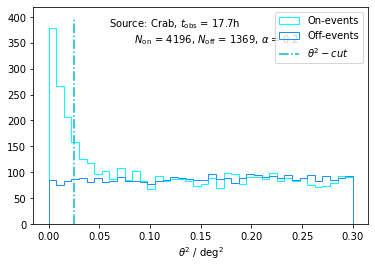

In [37]:
crab_events_sel_on = np.array(crab_events_sel['theta_deg'].values)
plt.hist((crab_events_sel_on)**2, bins =40, histtype='step', color='cyan', label='On-events')

plt.hist(np.array(theta_deg_off)**2, bins=40, histtype='step', color='dodgerblue', label='Off-events', weights=np.array([0.2 for el in theta_deg_off]))
plt.vlines(0.025, color='c', linestyle='-.', ymin=0, ymax=400, label=r'$\theta^{2}-cut$')
plt.xlabel(r'$\theta^2$ / $\deg^2$')
plt.legend()
plt.text(0.06, 350,
         r'''Source: Crab, $t_\mathrm{{obs}}$ = 17.7h
        $N_\mathrm{{on}}$ = {non}, $N_\mathrm{{off}}$ = {noff}, $\alpha$ = 0.2'''.format(non=len(crab_events_sel), noff=len(bkg)))
plt.savefig('On_Off.pdf')
print(len(crab_events_sel_1.theta_deg_off_1.values))

In [38]:
alpha = 0.2
n_on = len(crab_events_sel)
n_off = len(bkg)
sum1 = n_on * np.log((1 + alpha) / alpha * (n_on / (n_on + n_off)))
sum2 = n_off * np.log((1 + alpha) * (n_off / (n_on + n_off)))
S = np.sqrt(2) * np.sqrt(sum1 + sum2)
S

96.572336261452

In [41]:
gammas_pred = gamma_events[gamma_events['gamma_prediction'] > 0.8]
gammas_sel = gammas_pred[gammas_pred['theta_deg'] < lim_theta]

In [53]:
gamma_Epred = gammas_sel['gamma_energy_prediction']
corsika_totalE = gammas_sel['corsika_event_header_total_energy']

max_bin = max(max(gamma_Epred), max(corsika_totalE))
min_bin = min(min(gamma_Epred), min(corsika_totalE))

if max_bin<= max(np.logspace(np.log10(500), np.log10(20e3), 11)):
    next_bin = 12
    bins_1 = np.ones(next_bin)
else:
    next_bin = 13
    bins_1 = np.ones(next_bin)
    bins_1[-1] = 50e3
bins_1[0] = 0
for i in range(1, next_bin-1, 1):
    bins_1[i] = np.logspace(np.log10(500), np.log10(20e3), 11)[i-1]

In [54]:
bins1 = np.ones(8)
bins1[0] = 0
for i in range(1, 7, 1):
    bins1[i] = np.logspace(np.log10(500), np.log10(15e3), 6)[i-1]
bins1[-1] = 50e3

<Figure size 432x288 with 0 Axes>

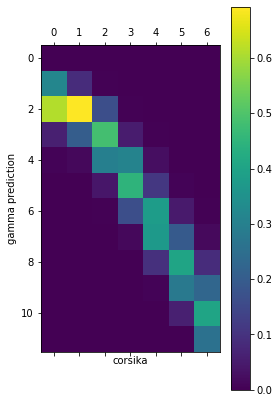

In [55]:
plt.figure(constrained_layout=True)
matrix, xedge, yedge = np.histogram2d(gamma_Epred, corsika_totalE, bins=[bins_1, bins1])

matrix = matrix / np.sum(matrix, axis=0)
plt.matshow(matrix)
plt.xlabel('corsika')
plt.ylabel('gamma prediction')
plt.colorbar()
plt.savefig('Matrix.pdf')

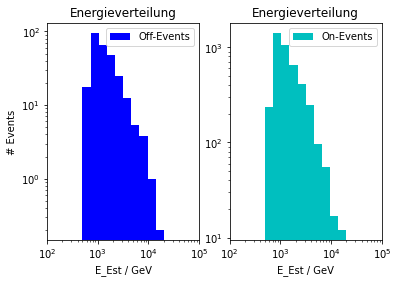

In [62]:
plt.subplot(1, 2, 1)
a = np.full_like(bkg['gamma_energy_prediction'], 0.2)
b, bins_b, p = plt.hist(bkg['gamma_energy_prediction'], bins=xedge, weights=a, color='b', label='Off-Events')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e5)
plt.xlabel('E_Est / GeV')
plt.ylabel('# Events')
plt.legend()
plt.title('Energieverteilung')
plt.subplot(1, 2, 2)
g, bins_g, p = plt.hist(crab_events_sel['gamma_energy_prediction'], bins=xedge, color='c', label='On-Events')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e5)
plt.xlabel('E_Est / GeV')
plt.legend()
plt.title('Energieverteilung')
plt.savefig('E_verteilung.pdf')

In [67]:
# svd entfaltung
from scipy.stats import poisson
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from uncertainties import unumpy as unp

pseudo_inv = unp.ulinalg.pinv(matrix)
print(pseudo_inv)
from uncertainties import ufloat

g_unc = np.array([ufloat(x, np.sqrt(x)) for x in g])
b_unc = np.array([ufloat(x, np.sqrt(x)) for x in b])

# entfaltung JETZT
ev = g-b
ev_unc = g_unc - b_unc
fNSVD = pseudo_inv@ev
fNSVD_unc = pseudo_inv.dot(ev_unc)[1:-1]
print(fNSVD)
print(fNSVD_unc)
fNSVD = fNSVD[1:-1]
print('fNSVD: ', fNSVD)

[[-4.68170762e-15  4.02782338e+00 -4.38649193e-01 -2.84924632e-01
   7.32481308e-01 -4.56038605e-01 -4.15146222e-02  1.43701722e-01
  -2.94487866e-02 -4.21212433e-02  1.35849807e-02  1.67651264e-02]
 [ 5.23412889e-15 -3.72829747e+00  1.95896808e+00 -7.79787284e-02
  -1.02547834e+00  6.83661945e-01  5.96429680e-02 -2.13066714e-01
   4.37092686e-02  6.24454722e-02 -2.01371657e-02 -2.48520204e-02]
 [-1.38488362e-15  8.87979379e-01 -6.52089929e-01  1.77484486e+00
   9.32844871e-01 -8.33787862e-01 -6.33686621e-02  2.51891454e-01
  -5.18270325e-02 -7.38094035e-02  2.37885318e-02  2.93633211e-02]
 [ 3.68309589e-16 -3.00521679e-01  2.11184093e-01 -6.60521054e-01
   7.01400188e-01  1.84862785e+00 -3.65264339e-02 -6.04477697e-01
   1.42401875e-01  1.85693043e-01 -6.15413585e-02 -7.49966809e-02]
 [-1.66312774e-16  1.09012109e-01 -7.63584933e-02  2.38349529e-01
  -3.04849714e-01 -4.27099363e-01  1.52524234e+00  1.41877945e+00
  -5.26996029e-01 -5.31728574e-01  1.96373630e-01  2.28346384e-01]
 [-6.

In [69]:
xpos = [yedge[i] - (yedge[i] - yedge[i-1])/2 for i in range(1, len(yedge))]
xpos = xpos[1:-1]
xerr = [(yedge[i] - yedge[i-1])/2 for i in range(2, len(yedge)-1)]

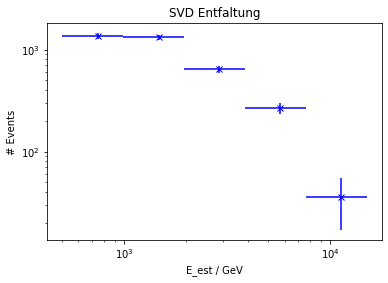

In [71]:
plt.errorbar(xpos, [x.nominal_value for x in fNSVD_unc], xerr=xerr, yerr=[x.std_dev for x in fNSVD_unc], fmt='bx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_est / GeV')
plt.ylabel('# Events')
plt.title('SVD Entfaltung')
plt.savefig('NSVD.pdf')

In [73]:
# poisson likelihood UnFoLiNg
def PoiHoodEntf(f, A, b, g):
    lam = A@f + b
    return -poisson.logpmf(g, lam).sum()

f, yedges = np.histogram(gamma_Epred, bins=yedge)
Bounds = [(1, 100000)]*len(f)

estimator = minimize(PoiHoodEntf, f+100, args=(matrix, b, g), method='L-BFGS-B', bounds=Bounds)
fLike = estimator['x']
fLike_plot = estimator['x'][1:-1]

Hesse_inv = estimator['hess_inv'].todense()
print('cov matrix: ', Hesse_inv)

cov matrix:  [[ 4.04241554e+03 -5.22194434e+03  6.34399330e+02 -2.21094578e+02
   1.04980064e+00 -1.61221190e+01  2.46062476e+01]
 [-5.22194434e+03  8.72449000e+03 -1.14728896e+03  7.68321775e+02
  -6.34573908e+02  2.83314735e+02 -5.05994707e+01]
 [ 6.34399330e+02 -1.14728896e+03  8.90029969e+02 -6.90528487e+02
   1.44672421e+02 -9.10379998e+01  3.29380011e+01]
 [-2.21094578e+02  7.68321775e+02 -6.90528487e+02  1.48642391e+03
  -6.36737456e+02  2.62948928e+02 -6.92178636e+01]
 [ 1.04980064e+00 -6.34573908e+02  1.44672421e+02 -6.36737456e+02
   9.34185933e+02 -4.65686289e+02  8.55369859e+01]
 [-1.61221190e+01  2.83314735e+02 -9.10379998e+01  2.62948928e+02
  -4.65686289e+02  2.60358009e+02 -5.18378093e+01]
 [ 2.46062476e+01 -5.05994707e+01  3.29380011e+01 -6.92178636e+01
   8.55369859e+01 -5.18378093e+01  2.81768928e+01]]


In [75]:
diag_cov = np.diag(Hesse_inv)
diag_cov_sqrt = np.sqrt(diag_cov)
print(diag_cov_sqrt[1:-1])
std_devs = diag_cov_sqrt[1:-1]

[93.40497847 29.83337005 38.55416853 30.56445538 16.13561306]


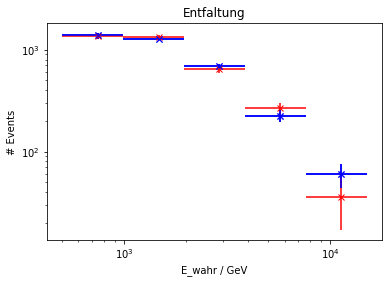

In [77]:
plt.errorbar(xpos, fLike_plot, xerr=xerr, yerr=std_devs, fmt='bx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_wahr / GeV')
plt.ylabel('# Events')
plt.title('Entfaltung')
plt.savefig('Entfaltung_2.pdf')

plt.errorbar(xpos, fNSVD, xerr=xerr, yerr=[x.std_dev for x in fNSVD_unc], fmt='rx')
plt.errorbar(xpos, fLike_plot, xerr=xerr, yerr=std_devs, fmt='bx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_wahr / GeV')
plt.ylabel('# Events')
plt.title('Entfaltung')
plt.savefig('Entfaltung_vgl.pdf')

In [79]:
#Zufallszahlen mit Multivarianten Gauss 
fLike_Var = np.random.multivariate_normal(fLike, Hesse_inv, size=10000)
fLike_Var = fLike_Var[:,1:-1]
fLike_Var[:, 0]
std_devs = np.ones(5)
for i in range(5):
    std_devs[i] = np.std(fLike_Var[:, i])
print(std_devs)

[93.03693359 29.79849948 38.99121137 30.75542835 16.2159971 ]


In [80]:
def flux(f, A, dE, t):
    return f / (A * dE * t)

t_obs = crab_runs['ontime'].sum()

Delta_E = np.diff(yedge[1:-1]*10**(-3))

In [81]:
# detektorflaeche fuer effektive flaeche
A = np.pi * 27000**2
# N_sel / N_dim
hist_sel, yedges = np.histogram(gamma_Epred, bins=yedge)
hist_sim, yedges = np.histogram(corsika_events['total_energy'], bins=yedge)

A_eff = hist_sel[1:-1] / hist_sim[1:-1] * A / 0.7
print('A_eff: ', A_eff)

A_eff:  [3.14066687e+07 2.44481124e+08 4.32338918e+08 5.49470259e+08
 5.50166488e+08]


Phi_NSVD: [1.4018890204763758e-09+/-1.0370693304397901e-10
 8.833372329309032e-11+/-4.848625446553254e-12
 1.220386074903245e-11+/-9.450371770449845e-13
 2.0140361631716092e-12+/-2.463038739884763e-13
 1.3804005947663244e-13+/-7.303963046635752e-14]
Phi_Like: [1.41279332e-09 8.56653452e-11 1.31116925e-11 1.71410722e-12
 2.29675909e-13]
Mean: [1.41241468e-09 8.56587376e-11 1.31171213e-11 1.71133490e-12
 2.30437080e-13]
Std: [9.52838829e-11 1.98568677e-12 7.44183140e-13 2.33932611e-13
 6.23933714e-14]


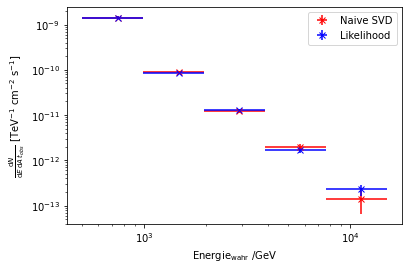

In [82]:
#Berechnung des Flusswertes
phi_NSVD = fNSVD_unc/(A_eff * Delta_E * t_obs)
phi_Like = fLike_plot/(A_eff * Delta_E * t_obs)

#Mittelwert und Standardabweichung
phi_Like_Var = fLike_Var/(A_eff * Delta_E * t_obs)
mean = phi_Like_Var.mean(axis=0)
std = phi_Like_Var.std(axis=0)
print('Phi_NSVD:', phi_NSVD)
print('Phi_Like:', phi_Like)
print('Mean:',mean)
print('Std:',std)

plt.errorbar(xpos, [x.nominal_value for x in phi_NSVD], xerr=xerr, yerr=[x.std_dev for x in phi_NSVD], fmt ='rx', label='Naive SVD')
plt.errorbar(xpos, phi_Like, xerr=xerr, yerr=std, fmt ='bx', label='Likelihood') 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energie$_\mathrm{wahr}$ /GeV')
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E \, \mathrm{d}A \, t_{obs}}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.savefig('Fluss.pdf')

In [83]:
def func(x, a, b, c, d):
     return a * (x/b) ** (-c + d * np.log(x/b))

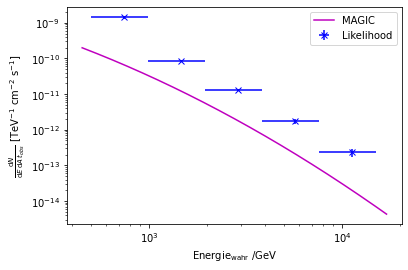

In [84]:
x = np.linspace(450, 17000, 10000)
y = func(x, 3.23*10**(-11), 1000, 2.47,-0.24)
plt.plot(x, y, 'm-', label='MAGIC')                         
plt.errorbar(xpos, mean, yerr = std, xerr=xerr, fmt='bx', label='Likelihood')
#plt.fill_between(yedge[1:-1],mean-std,mean+std,facecolor='b',alpha=0.2, label='$1 \sigma$-Umgebung') 
#plt.fill_betweenx(mean, yedge[1:-1]-[(yedge[i] - yedge[i-1])/2 for i in range(1,len(yedge)-1)], yedge[1:-1]+[(yedge[i] - yedge[i-1])/2 for i in range(1,len(yedge)-1)],facecolor='b',alpha=0.2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energie$_\mathrm{wahr}$ /GeV')
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E \, \mathrm{d}A \, t_{obs}}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.savefig('Fluss_Like.pdf')